In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [227]:
df=pd.read_csv('Car_Price_Prediction.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Car_Price_Prediction.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


<Axes: ylabel='Make'>

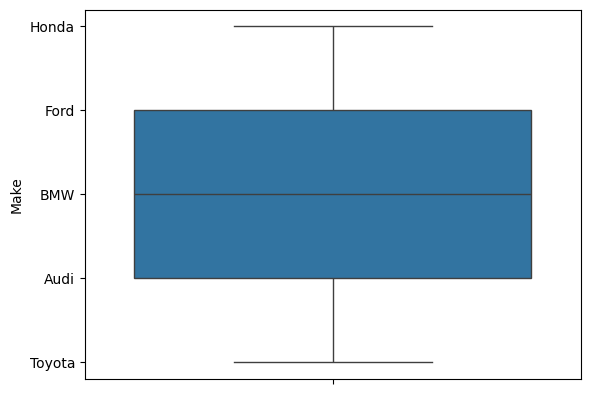

In [ ]:
sns.boxplot(y='Make',data=df)

<Axes: ylabel='Model'>

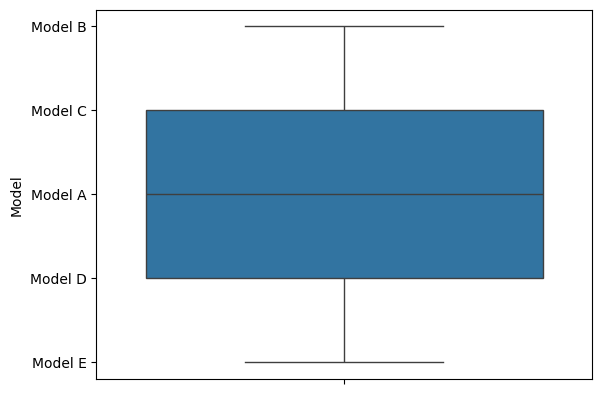

In [ ]:
sns.boxplot(y='Model',data=df)

<Axes: ylabel='Year'>

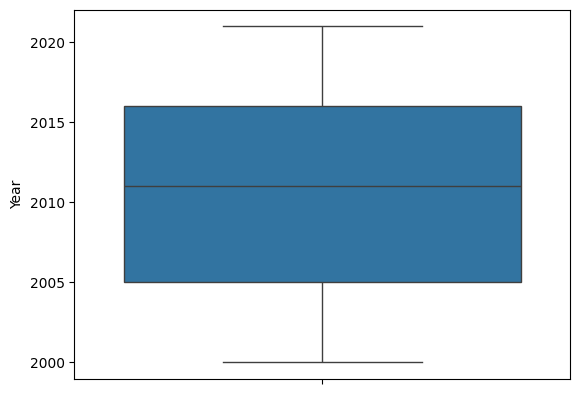

In [ ]:
sns.boxplot(y='Year',data=df)

In [ ]:
df["Year"].unique()

array([2015, 2014, 2006, 2004, 2000, 2018, 2021, 2016, 2007, 2001, 2019,
       2017, 2010, 2009, 2003, 2012, 2008, 2002, 2020, 2011, 2005, 2013])

<Axes: ylabel='Engine Size'>

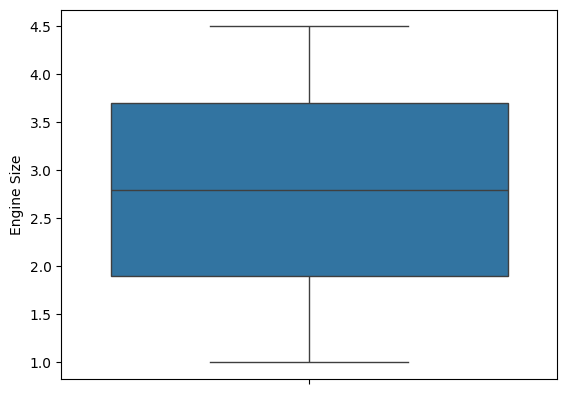

In [ ]:
sns.boxplot(y='Engine Size',data=df)

<Axes: ylabel='Mileage'>

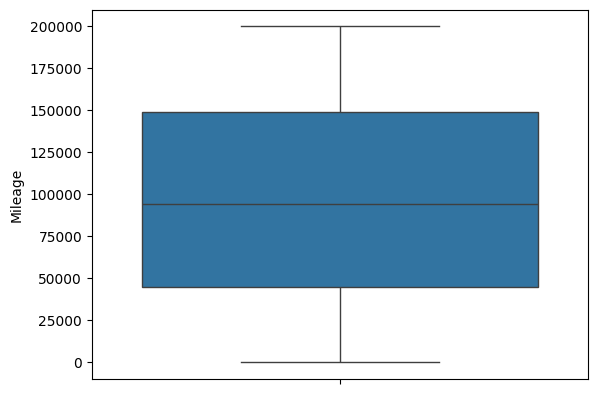

In [ ]:
sns.boxplot(y='Mileage',data=df)

<Axes: ylabel='Fuel Type'>

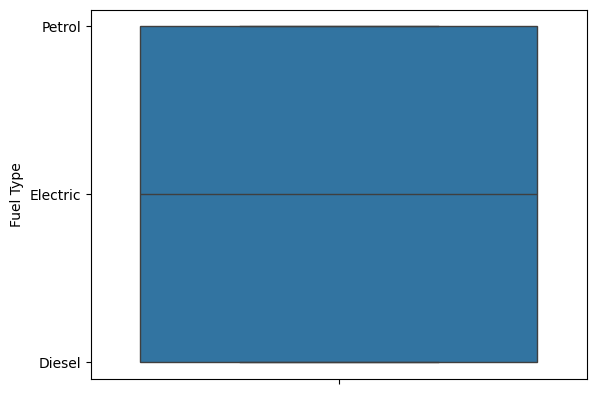

In [ ]:
sns.boxplot(y='Fuel Type',data=df)

In [ ]:
df['Price'].unique()

array([30246.20793121, 22785.74768433, 25760.29034717, 25638.00349071,
       21021.38665739, 25509.93287629, 12268.20602523, 27783.73788099,
       27392.17842052, 28434.53362362, 29404.95400506, 36811.01281669,
       25205.00395937, 27796.07550135, 23521.88168355, 26493.1832312 ,
       16626.37944501, 21122.18914162, 21853.33258715, 34716.9800197 ,
       32761.64549909, 23469.16158943, 20093.07080877, 18920.31855484,
       20152.09690167, 21520.12291775, 23293.13030872, 23633.38954774,
       29288.89578863, 25839.54216183, 25546.58880083, 14089.7884084 ,
       22788.32129596, 27694.61192854, 15961.21390288, 22519.39025009,
       19181.81635933, 16604.4981698 , 23648.41735743, 37032.60751681,
       28849.57939888, 25844.62473357, 31479.64694322, 14502.97586812,
       17622.00458952, 26785.39816863, 28722.71774327, 20951.40955858,
       19794.71897813, 30130.30956258, 29445.48311356, 24753.59681453,
       22407.7226835 , 23895.75456202, 31599.82614854, 23726.57862526,
      

In [ ]:
df['Price']=df['Price']*100000
df['Price']

0      3.024621e+09
1      2.278575e+09
2      2.576029e+09
3      2.563800e+09
4      2.102139e+09
           ...     
995    2.276560e+09
996    3.039258e+09
997    1.644689e+09
998    2.739616e+09
999    3.162086e+09
Name: Price, Length: 1000, dtype: float64

In [ ]:
df.to_csv('cleaned_data.csv')

In [ ]:
obj=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
     df[i]=obj.fit_transform(df[i])
     


In [ ]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,3.024621e+09
1,2,2,2014,1.7,94799,1,0,2.278575e+09
2,1,1,2006,4.1,98385,1,1,2.576029e+09
3,3,1,2015,2.6,88919,1,0,2.563800e+09
4,3,2,2004,3.4,138482,2,0,2.102139e+09


In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model=RandomForestRegressor(random_state=42)
params={
    "n_estimators":[100,150,200,250,300,350],
    "max_depth":[3,4,5,6,7]
}
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [ ]:
print('training:',grid.score(Xtrain,ytrain))
print('testing:',grid.score(Xtest,ytest))

training: 0.9327013851010626
testing: 0.7950873433643628


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
base_model= DecisionTreeRegressor(max_depth=3)
model=AdaBoostRegressor(estimator=base_model,n_estimators=250,random_state=42)
model.fit(Xtrain,ytrain)


,estimator,DecisionTreeR...r(max_depth=3)
,n_estimators,250
,learning_rate,1.0
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [ ]:
print('training:',model.score(Xtrain,ytrain))
print('testing:',model.score(Xtest,ytest))

training: 0.8376946206388209
testing: 0.7964435742493564


In [ ]:
with open('Adaboost_model.pkl','wb') as file:
    pickle.dump(model,file)